In [1]:
pwd


'/content'

In [2]:
!pip install keras==2.2.4
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 5.2 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.2.4 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [3]:
#Importing library

In [4]:
import numpy as np
import tensorflow
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

In [5]:
#load data

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
#data Analyzing

In [9]:
x_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
y_train[16]

2

In [11]:
import matplotlib.pyplot as plt

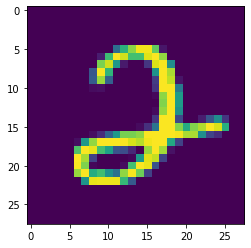

In [12]:
plt.imshow(x_train[16])

In [13]:
#shaping the data

In [14]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [15]:
no_of_classes=10
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [16]:
y_train[16]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, (3,3),input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))

In [20]:
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

In [23]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [24]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [25]:
# train the model

In [27]:

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 124s 65ms/step - loss: 0.2509 - accuracy: 0.9383 - val_loss: 0.0610 - val_accuracy: 0.9805
Epoch 2/5
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0631 - accuracy: 0.9807 - val_loss: 0.0475 - val_accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0499 - accuracy: 0.9852 - val_loss: 0.0549 - val_accuracy: 0.9824
Epoch 4/5
1875/1875 [==============================] - 119s 64ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0383 - val_accuracy: 0.9887
Epoch 5/5
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0389 - accuracy: 0.9884 - val_loss: 0.0365 - val_accuracy: 0.9872


In [28]:
# Testing the model

In [29]:
prediction = model.predict(x_test[:4])
prediction

1/1 [==============================] - 0s 118ms/step


array([[4.24495127e-11, 4.33925638e-11, 3.67028008e-08, 1.91169788e-10,
        6.83676477e-13, 1.31963566e-14, 8.54759719e-20, 1.00000000e+00,
        3.36504994e-13, 2.55171795e-09],
       [4.71820476e-06, 3.13298870e-06, 9.99984503e-01, 2.16439526e-06,
        2.05246775e-09, 5.46816203e-10, 5.26911253e-06, 4.32154442e-12,
        2.65987524e-07, 2.70832293e-12],
       [1.80561059e-07, 9.99986649e-01, 1.10868484e-07, 3.81364949e-08,
        1.20566369e-07, 6.69753035e-08, 9.49688115e-07, 1.71065199e-06,
        2.67226284e-07, 9.83531208e-06],
       [9.99922872e-01, 2.83473534e-09, 1.92352513e-06, 4.25276454e-07,
        4.22481918e-07, 1.19037759e-06, 6.18244012e-05, 1.65272525e-07,
        8.83491884e-06, 2.27687406e-06]], dtype=float32)

In [30]:
np.argmax(prediction, axis=1)

array([7, 2, 1, 0])

In [31]:
# Observing the metrics

In [33]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print('METRICS\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(metrics[0],metrics[1]))

METRICS
 Loss: 0.036
 Accuracy: 0.987


In [34]:
# Saving the model

In [35]:
model.save("ibm_mnistcnn.h5")

In [36]:
ls

ibm_mnistcnn.h5  sample_data/


In [37]:
!tar -zcvf handwritten-model.tgz ibm_mnistcnn.h5

ibm_mnistcnn.h5


In [38]:
ls

handwritten-model.tgz  ibm_mnistcnn.h5  sample_data/


In [40]:
# installing watson machine learnig

In [39]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 5.2 MB/s 
     |████████████████████████████████| 132 kB 60.2 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 9.9 MB 52.0 MB/s 
     |████████████████████████████████| 140 kB 57.3 MB/s 
     |████████████████████████████████| 956 kB 55.7 MB/s 
     |████████████████████████████████| 135 kB 51.9 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=fc409732fbd525d58e090983e422f686d696eb01687c66ac4e31a48fde788aed
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=b421d7d1c77

In [43]:
# Testing the model

In [44]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [45]:
model = load_model("ibm_mnistcnn.h5")

In [47]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 6.0 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=a754b94d3c6a2372c9c93d88c775d80aefc7287896505d16b3dbd855903de745
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [48]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:

!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 3.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 2.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 3.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 3.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.2 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-li